In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [4]:
(x_train, y_train) , (x_test, y_test) = keras.datasets.mnist.load_data()

In [5]:
len(x_test)

10000

In [7]:
x_train[0].shape

(28, 28)

In [8]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

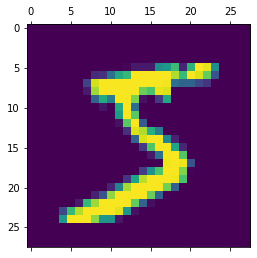

In [9]:
plt.matshow(x_train[0])

In [10]:
y_train[0]

5

In [13]:
x_train=x_train/255
x_test=x_test/255

In [14]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [17]:
x_train_f=x_train.reshape(len(x_train),28*28)
x_test_f=x_test.reshape(len(x_test),28*28)

In [18]:
x_test_f.shape

(10000, 784)

In [24]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_f, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4888 - accuracy: 0.8767
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3065 - accuracy: 0.9156
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2854 - accuracy: 0.9216
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2750 - accuracy: 0.9239
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2675 - accuracy: 0.9258


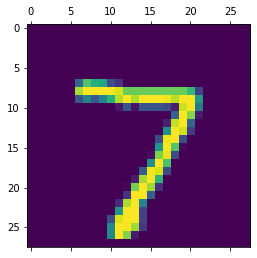

In [28]:
plt.matshow(x_test[0])

In [29]:
y_predicted=model.predict(x_test_f)

In [30]:
y_predicted[0] 

array([1.2766898e-05, 1.1900606e-10, 3.6628968e-05, 8.8489354e-03,
       1.1946343e-06, 9.4930700e-05, 1.1232576e-09, 7.8101897e-01,
       8.5259744e-05, 8.7445974e-04], dtype=float32)

In [37]:
np.argmax(y_predicted[0])

7

In [34]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]

In [35]:
y_predicted_labels[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]

In [38]:
cm= tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    1,    2,    0,    5,    7,    2,    3,    0],
       [   0, 1111,    2,    2,    0,    1,    4,    2,   13,    0],
       [   6,    9,  921,   18,    7,    4,   11,   12,   41,    3],
       [   1,    0,   18,  924,    0,   18,    2,   13,   28,    6],
       [   1,    1,    4,    1,  921,    0,    9,    4,    9,   32],
       [   8,    2,    5,   37,    9,  773,   11,    7,   33,    7],
       [  10,    3,    8,    1,    7,   11,  913,    2,    3,    0],
       [   1,    5,   23,    2,    9,    0,    0,  956,    3,   29],
       [   4,    7,    6,   18,    9,   23,    9,   13,  881,    4],
       [  10,    7,    1,   10,   30,    7,    0,   25,   12,  907]])>

Text(69.0, 0.5, 'true value')

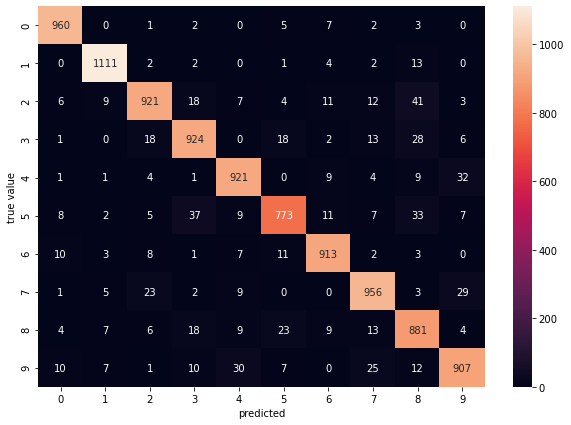

In [40]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('true value')


# adding Hidden layers

In [43]:
model = keras.Sequential([
     keras.layers.Dense(100, input_shape=(784,), activation='relu'),
     keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_f, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2841 - accuracy: 0.9197
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1308 - accuracy: 0.9622
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0947 - accuracy: 0.9717
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0738 - accuracy: 0.9775
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0585 - accuracy: 0.9819
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0492 - accuracy: 0.9850
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0398 - accuracy: 0.9878
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0330 - accuracy: 0.9901
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0285 - accuracy: 0.9911
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.023

In [44]:
model.evaluate(x_test_f,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0884 - accuracy: 0.9736


[0.08837894350290298, 0.9735999703407288]

Text(69.0, 0.5, 'Truth')

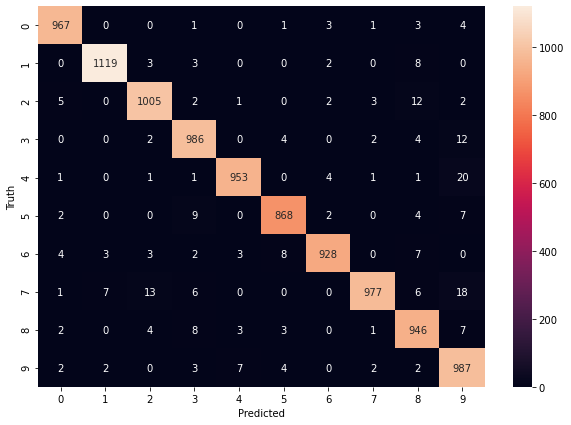

In [46]:
y_predicted = model.predict(x_test_f)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [48]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3026 - accuracy: 0.9166
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1424 - accuracy: 0.9585
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1019 - accuracy: 0.9695
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0796 - accuracy: 0.9763
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0625 - accuracy: 0.9812
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0516 - accuracy: 0.9839
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0430 - accuracy: 0.9865
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0354 - accuracy: 0.9893
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0302 - accuracy: 0.9908
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.024

In [49]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.0821 - accuracy: 0.9763


[0.08210401237010956, 0.9763000011444092]